<h1><div align='middle'>GERENCIAMENTO DE ESTOQUE <br>E PESQUISA OPERACIONAL</div><h1>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

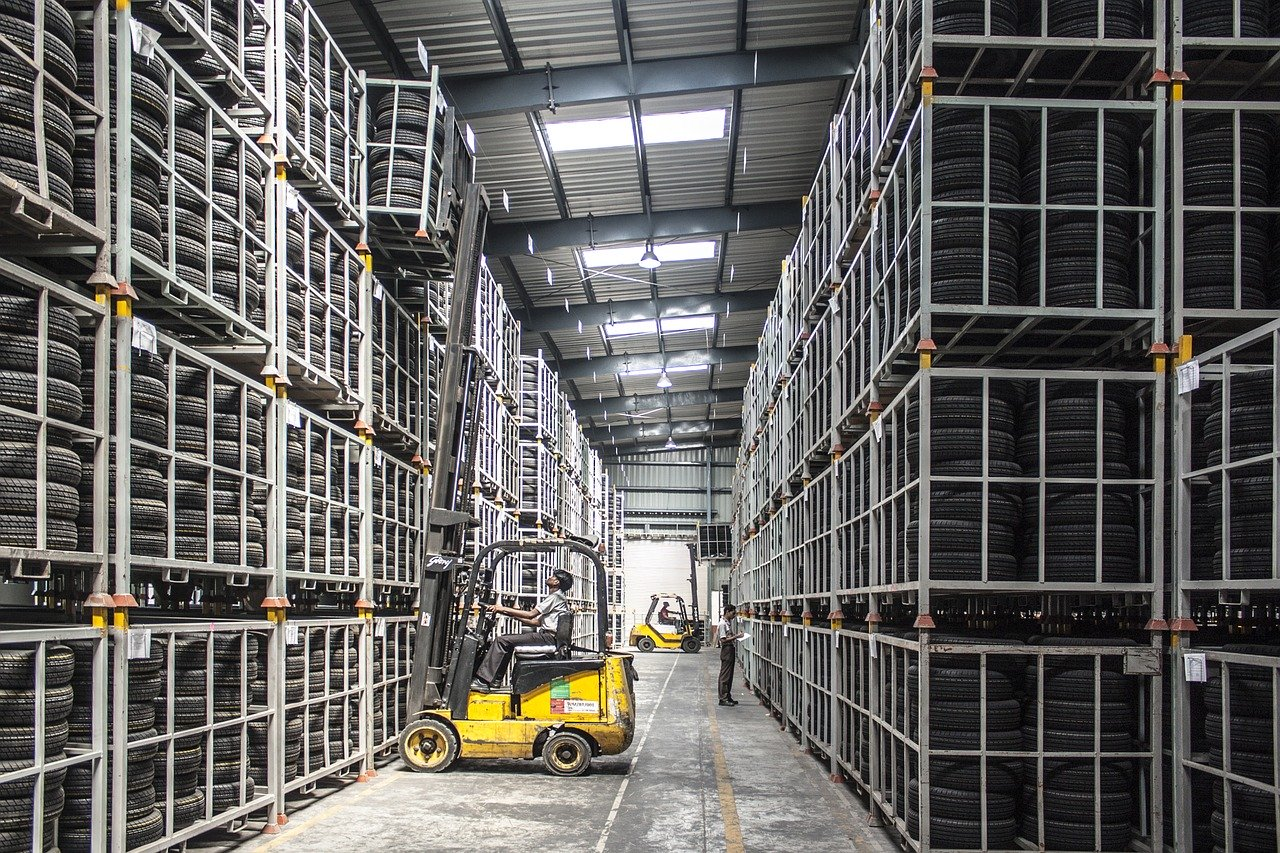

In [12]:
from IPython import display
display.Image(r'C:\Users\joaov\Desktop\PROJETOS PYTHON\PO 3\estoque.jpg')

<h2>MODELO EOQ OU LEC <br>*ECONOMIC ORDER QUANTITY*<br>*LOTE ECONÔMICO DE COMPRA* <h2>

<h3>Quando Podemos Usar os Modelos EOQ?

Devido à sazonalidade e diversos outros fatores, a demanda de determinados produtos pode ser bas-
tante irregular. Quando isso acontece, o pressuposto de Demanda Constante, que assumimos para

todos os modelos EOQ, não será satisfeita.
No entanto, em determinadas situações, podemos assumir uma demanda constante sem temer que o

nosso modelo fique muito longe da realidade. Para sabermos quando podemos fazer essa simplifica-
ção, suponha que durante n períodos de tempo foram observadas as demandas d1, d2, ..., dn. Além

disso, sabemos o suficiente a respeito de demandas futuras que nos permite assumir um pressuposto
de demanda determinística. Para saber se a demanda é suficientemente regular para justificar o uso
de um modelo EOQ, faça o seguinte:

1. Calcule a demanda média. Chamaremos de D.

2. Determine uma estimativa da variância da demanda por período. Chamaremos de var.

3. Determine uma estimativa da variabilidade relativa da demanda (chamado coeficiente de variabilidade).<BR> VC= Estimativa Var/D²

Pesquisas indicam que se VC < 0,2, então podemos usar os modelos EOQ. Caso contrário, a demanda
é muito irregular e o uso de outros modelos mais adequados se justifica.<h3>

<h2>1.Verificando se a demanda se adequa ao modelo eoq<h2>

In [37]:
def VC(demanda_lista):
    temp=np.mean(demanda_lista)
    tempq=temp**2
    var=np.var(demanda_lista)
    return var/tempq

<h2>2.EOQ, cálculo do tamanho de lote (Economic Order Quantity) e Ponto do Pedido (Order Point)<h2>

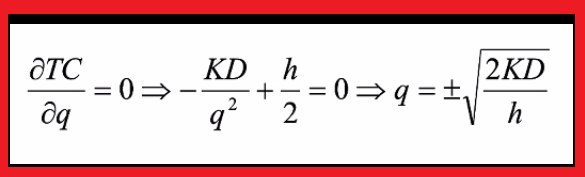

In [18]:
from IPython import display
display.Image(r'C:\Users\joaov\Desktop\PROJETOS PYTHON\PO 3\EOQ.png')

<h3> D->Demanda<br>
     K->Custo fixo pedido<br>
     L->Tempo de Espera =0<br>
     H->Custo de estocagem<br>
     p->Custo do Produto<br>
     q->Quantidade Pedido<br>
        <h3>

In [19]:
def eoq(K,D,h):                   #LOTE ECONÔMICO DE COMPRA
    q=np.sqrt(2*K*D/h)
    print('q*:',q)
    return q

In [20]:
def PP(D,dias_entrega,periodo,q): #PONTO DO PEDIDO
    L=dias_entrega/periodo
    if L*D>q:
        PP=(L*D)%q
        return PP
    else:
        PP=(L)*(D)
        return PP

<h2>3.Visualização do Inventário no tempo<h2>

In [325]:
def funcao_estoque(q,demanda,dias_ano=365,S=0):
    
    pedidos_ano=int(demanda/q)
    ciclo_dias=int(dias_ano/pedidos_ano)
    matrix=np.zeros(((2*pedidos_ano),3))
    
    lista_ciclos=[]
    #dias
    for i in range(1,pedidos_ano+1):
        lista_ciclos.append(i)
        lista_ciclos.append(i)
    matrix[:,0]=lista_ciclos
    
    lista_dias=[0]  
    for i in range(1,pedidos_ano+1):
        if (i*ciclo_dias)<=dias_ano:
            lista_dias.append(i*ciclo_dias)
            lista_dias.append(i*ciclo_dias)
    
    matrix[:,1]=lista_dias[:(pedidos_ano*2)]
    
    lista_inventario=[]
    for i in range(1,pedidos_ano+1):
        lista_inventario.append(q)
        lista_inventario.append(S)
    
    matrix[:,2]=lista_inventario
    
    #print(matrix)
    
    fig,ax=plt.subplots(figsize=(18,10))
    plt.grid(color='r')   
    ax.plot(matrix[:,1],matrix[:,2])
    ax.set_title('Gráfico de Estoque x Tempo',fontsize=18)
    ax.set_xlabel('Tempo',fontsize=18)
    ax.set_ylabel('Estoque',fontsize=18)

<h2>4.Cálculo de Custo Total<h2>

<h3>CUSTO TOTAL (SEM FALTA DE ESTOQUE)= (D/q)*K +1/2*(K*h)+p*D<br>CUSTO TOTAL COM FALTA DE ESTOQUE= M²*h/2*q + (q-M)²*s/2*q+ K*D/q+p*D<h3>

<h3> D->Demanda<br>
     K->Custo fixo pedido<br>
     L->Tempo de Espera =0<br>
     H->Custo de estocagem<br>
     p->Custo do Produto<br>
     q->Tamanho do lote<br>
     M->Novo Tamanho do lote<br>
     s->Custo de Falta em Estoque
        <h3>

In [335]:
def TC(K,D,q,h,p):                #CUSTO TOTAL SEM FALTA NO ESTOQUE
    TC=(D/q)*K+(1/2)*(q*h)+p*D
    print('============================')
    return TC


def TC_falta(eoq,h,s,p,D,k,M=None):         #CUSTO TOTAL COM FALTA NO ESTOQUE
    q=eoq*np.sqrt((h+s)/s)
    
    if M==None:
        M=eoq*np.sqrt((s)/(s+h))
    
    TC=((M**2)*h/(2*q))+(1/(2*q))*((q-M)**2)*s+k*D/q+p*D
    return TC

def falta_max_estoque(eoq,h,s):
    q=eoq*np.sqrt((h+s)/s)
    M=eoq*np.sqrt((s)/(s+h))
    falta=q-M
    return int(falta)

def tamanho_do_lote_com_falta(eoq,h,s):
    q=eoq*np.sqrt((h+s)/s)
    return q

def grafico_custos_com_falta(eoq,h,s,p,D,k,M):
    inicio=int(0.1*eoq)
    final=int(5*eoq)
    x=np.linspace(inicio,final,100)

    y=[]
    for valor in x:
        y.append(TC_falta(valor,h,s,p,D,k,M))
    
 
    fig,ax=plt.subplots(figsize=(20,10))
    ax.set_title("TC(q,M*)",fontsize=18)
    ax.set_xlabel("Tempo", fontsize=18)
    ax.set_ylabel("TC", fontsize=18)
    ax.grid()   
    ax.plot(x,y)
    

<h2>EXEMPLO<h2>
<h3>A Speedy Wheels é um distribuidor de bicicletas no atacado. Seu gerente de estoques, Ricky Sapolo, está revendo no momento a política de estoques para um modelo popular. As vendas mensais dos últimos anos podem ser vistas na tabela abaixo, e refletem o que acontece ano a ano. 
O custo administrativo para se fazer um pedido desse modelo para o fabricante é de US 240 e o preço de compra é de US 50 por bicicleta. Cada pedido demora em geral 15 dias para ser entregue. O custo anual do capital   imobilizado em estoque é de 20% do valor (baseado no preço de compra) dessas bicicletas. O custo adicional para armazenar as bicicletas — incluindo aluguel de depósito, seguro, impostos e outros — é de US 4 por bicicleta por ano.
<h3>
<h2>As Demandas para os seguintes meses: Jan	 Fev	Mar 	Abr 	Mai 	Jun 	Jul 	Ago 	Set 	Out 	Nov 	Dez<br>
    
    São: 287 250 239 261 299 266 272 267 226 279 283 276

In [336]:
Demanda=[287,250,239,261,299,266,272,267,226,279,283,276]

In [337]:
#testing VC
VC(Demanda)

0.00551507614126718

In [338]:
#eoq
q=eoq(240,sum(Demanda),14)

q*: 331.4901420641559


In [339]:
#reorder point
PP(sum(Demanda),15,365,q)

131.71232876712327

In [340]:
#total cust
TC(240,sum(Demanda),q,14,50)

164890.8619888982

<h3>Os clientes da Speedy Wheel (lojas varejistas) geralmente não se importam com pequenos atrasos na entrega de seus pedidos. Portanto, a gerência concordou com uma nova política com faltas de produto ocasionais para reduzir o custo de estoque variável. Após consultas com a gerência, Ricky estima que o custo de escassez anual (incluindo negócios futuros perdidos) seria de US$ 55 por bicicleta em falta durante o ano. Determine a nova política de estoques ótima para esse caso, e desenhe os gráficos I(t) e TC(q).<h3>

In [341]:
#new q*
newq=tamanho_do_lote_com_falta(q,14,55)
newq

371.29048382179604

In [342]:
#Falta em estoque (máxima)
falta=falta_max_estoque(q,14,55)
falta

75

In [343]:
TC_falta(q,14,55,50,sum(Demanda),240)

164393.38655859107

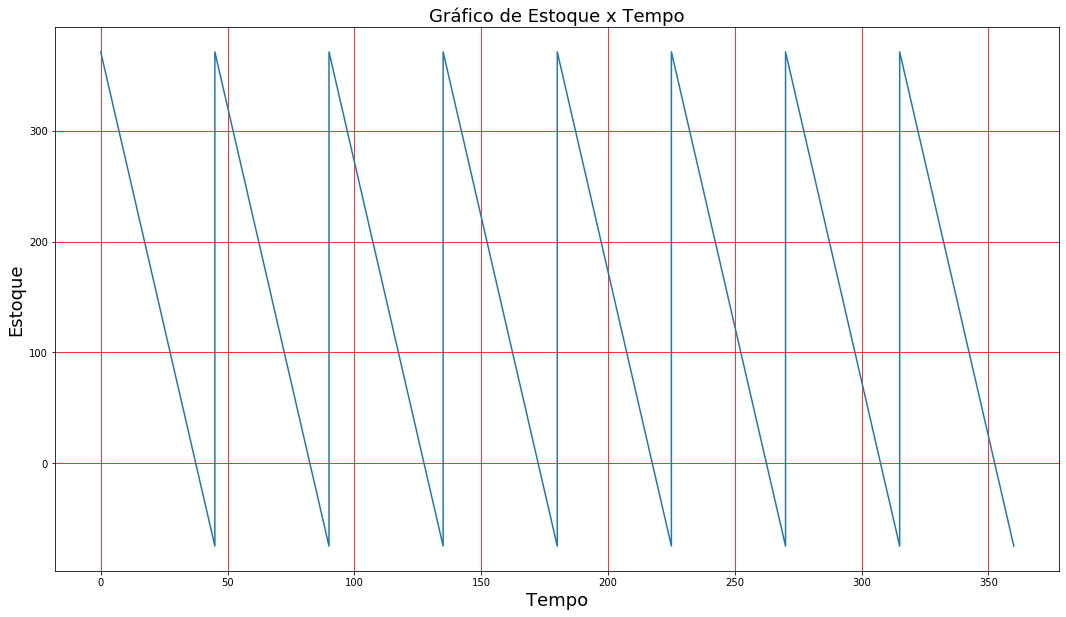

In [344]:
funcao_estoque(newq,sum(Demanda),dias_ano=365,S=-75)

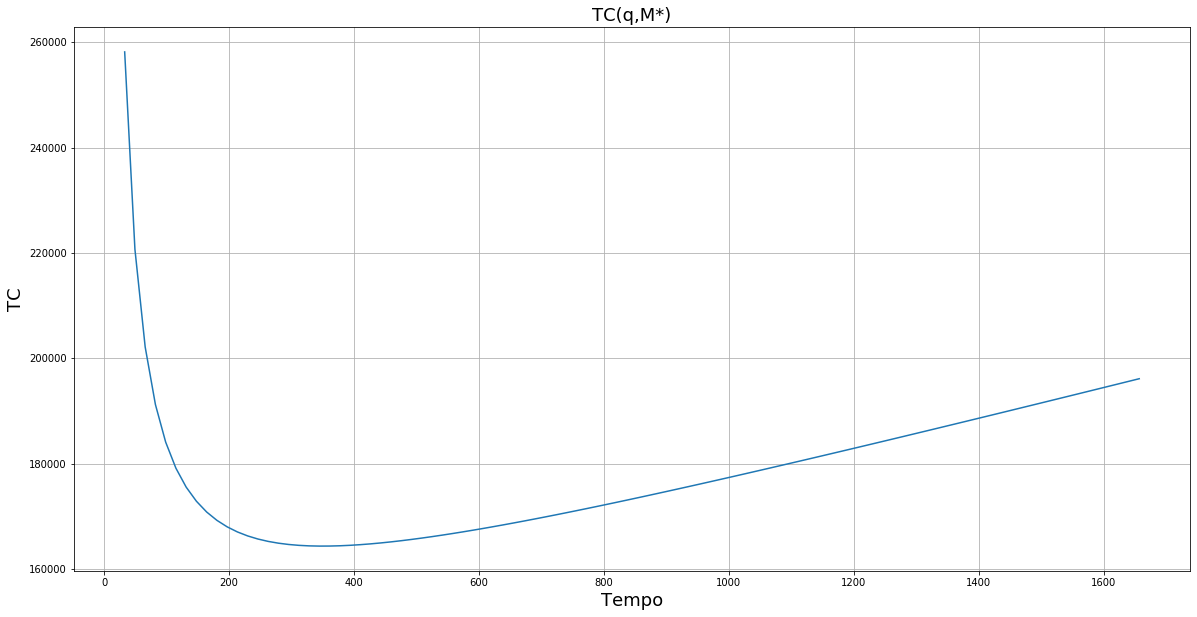

In [345]:
grafico_custos_com_falta(q,14,55,50,sum(Demanda),240,q-15)